In [1]:
from time import sleep
from os import chdir, mkdir
from os.path import isdir, isfile

try:
    chdir(r'A:\_Projetos\AnotacoesEstudosBackPythonLSP\Home\acoes')
except:
    chdir(r'C:\Users\GOMEE11\Documents\_Referencias\Git\AnotacoesEstudosBackPythonLSP\Home\acoes')

for d in ['.\\Graph', '.\\Tables']:
    if isdir(d):
        pass
    else:
        mkdir(d)
        pass

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from make_data import Down_Data, Analisys, Graph
import datetime

%matplotlib inline

# Analise individual de Ticker

### Analise Técnica

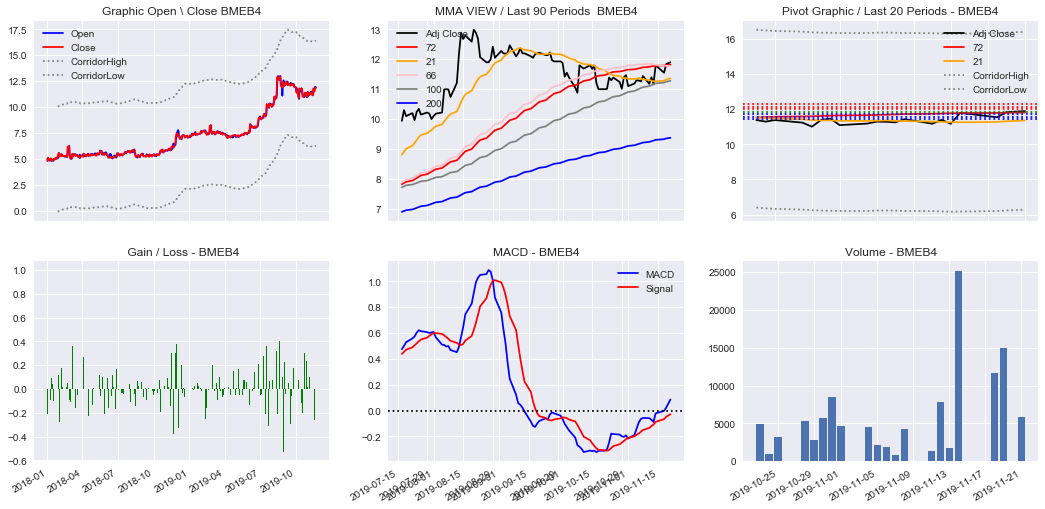

In [36]:
ticker = 'BMEB4'

target = Down_Data(ticker)
analise = Analisys(target, ticker)
graph = Graph(target, ticker)

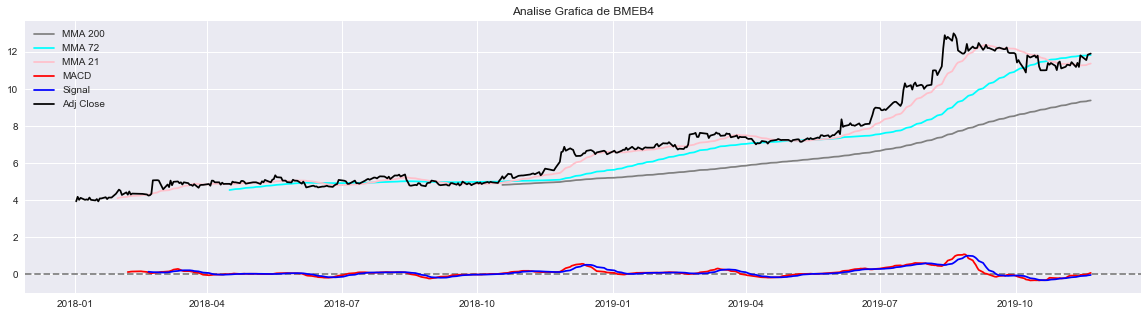

In [37]:
plt.figure(figsize=(20, 5))

plt.plot(analise['MMA200'], color='Grey', label='MMA 200')
plt.plot(analise['MMA72'], color='Cyan', label='MMA 72')
plt.plot(analise['MMA21'], color='Pink', label='MMA 21')

plt.axhline(0, color='Grey', linestyle="--")

plt.plot(analise['MACD'], color='Red', label='MACD')
plt.plot(analise['Signal'], color='Blue', label='Signal')

plt.plot(analise['Adj Close'], color='Black', label='Adj Close')


plt.title(f'Analise Grafica de {ticker}')

plt.legend()

plt.show()

## Euler Discratization

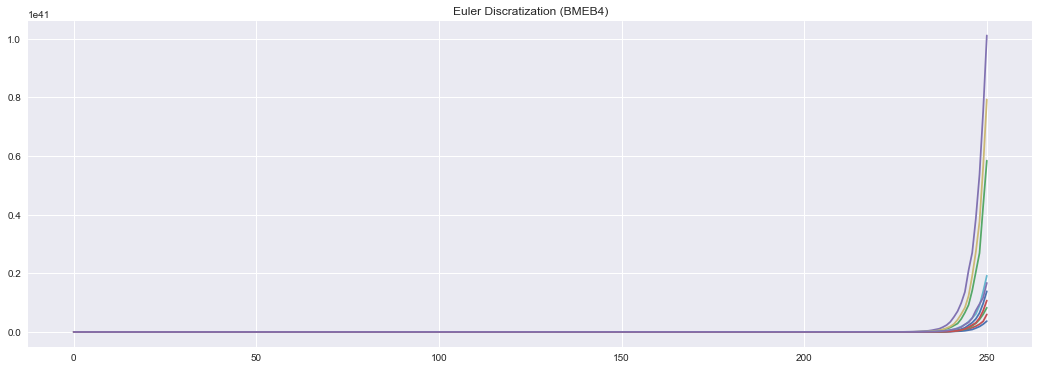

In [38]:
log_returns = np.log(1 + analise['Adj Close'].pct_change())
r = 0.025
stdev = log_returns.std() * 250 ** 0.5
#stdev = stdev.values
T = 1.0
t_intervals = 250
delta_t = T / t_intervals
iterations = 10000
z = np.random.standard_normal((t_intervals + 1, iterations))
s = np.zeros_like(z)
S0 = analise['Adj Close'].iloc[-1]
s[0] = S0

for t in range(1, t_intervals + 1):
    s[t] = s[t - 1] * np.exp((r - 0.5 * stdev **2) * delta_t + stdev + delta_t ** 0.5 * z[t])
    pass

plt.figure(figsize=(18,6))
plt.title(f'Euler Discratization ({ticker})')
plt.plot(s[: , :10])
plt.show()

In [40]:
analise.tail(9)


,High,Low,Open,Close,Volume,Adj Close,MMA200,MMA100,MMA72,MMA66,MMA21,PriceX2,CorridorHigh,CorridorLow,GainLoss,MACD,Signal
Date,,,,,,,,,,,,,,,,,
2019-11-07,11.39,11.25,11.39,11.26,800.0,11.26,9.191219,11.0364,11.711389,11.829242,11.345238,22.520000,16.371254,6.220246,-0.13,-0.065128,-0.164409
2019-11-08,11.50,11.15,11.48,11.44,4200.0,11.44,9.214165,11.0706,11.731389,11.836061,11.330952,22.879999,16.353004,6.201996,-0.04,-0.056731,-0.150107
2019-11-11,11.50,11.18,11.50,11.18,1400.0,11.18,9.235903,11.1014,11.746389,11.842727,11.306667,22.360001,16.345004,6.193996,-0.32,-0.058269,-0.134509
2019-11-12,11.40,11.15,11.19,11.40,7800.0,11.40,9.258740,11.1342,11.763333,11.845606,11.287619,22.799999,16.328754,6.177746,0.21,-0.070897,-0.119772
2019-11-13,11.20,11.13,11.13,11.18,1800.0,11.18,9.280386,11.1623,11.776667,11.830303,11.263810,22.360001,16.305254,6.154246,0.05,-0.087436,-0.108177
2019-11-14,12.00,11.30,11.30,11.80,25200.0,11.80,9.304443,11.1943,11.787917,11.813788,11.264286,23.600000,16.317754,6.166746,0.50,-0.021603,-0.086595
2019-11-18,12.00,11.55,11.81,11.55,11700.0,11.55,9.327019,11.2208,11.795556,11.796667,11.280952,23.100000,16.351504,6.200496,-0.26,-0.001795,-0.065883
2019-11-19,12.00,11.42,11.97,11.84,14900.0,11.84,9.351735,11.2493,11.807361,11.782121,11.320952,23.680000,16.383254,6.232246,-0.13,0.023269,-0.047856
2019-11-21,11.98,11.70,11.87,11.90,5800.0,11.90,9.375878,11.2787,11.823472,11.771667,11.363810,23.799999,16.423254,6.272246,0.03,0.086090,-0.028056


### Analise Fundamentalista
http://www.fundamentus.com.br/detalhes.php?papel=

In [41]:
dia = f'{datetime.datetime.now().year}-{datetime.datetime.now().month}-{datetime.datetime.now().day}'

Preco = analise['Adj Close'][-1]

vals_1 = ['52.416.000', '878.333.000', '1,80', '16,76']
vals_2 = []

for v in vals_1:
    x = v.replace('.', '_')
    x = x.replace(',', '.')
    vals_2.append(float(x))

NroAcoes = vals_2[0]
VPatriLiq = vals_2[1]
V_VP = Preco / (VPatriLiq / NroAcoes)
LPA, VPA = vals_2[2] , vals_2[3]

VIntrinseco = (22.5 * LPA * VPA) ** 0.5
JustoSimNao = (VIntrinseco - Preco) - 1

FundReport = pd.DataFrame(
    [
        [
        ticker,
        Preco,
        NroAcoes,
        VPatriLiq,
        round(V_VP, 5),
        LPA,
        VPA,
        VIntrinseco,
        JustoSimNao
        ]

        ],
    columns=[
        'Ticker',
        'Preco',
        'Numero Acoes',
        'Valor Patrimonial',
        'V/VP',
        'LPA',
        'VPA',
        'Valor Intrinseco',
        'Justo'
        ],
    index=[dia]
    )


FundReport

,Ticker,Preco,Numero Acoes,Valor Patrimonial,V/VP,LPA,VPA,Valor Intrinseco,Justo
2019-11-22,BMEB4,11.9,52416000.0,878333000.0,0.71015,1.8,16.76,26.053407,13.153407


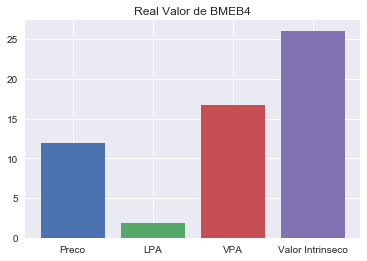

In [46]:
plt.bar('Preco', FundReport['Preco'], label='Preco')
plt.bar('LPA', FundReport['LPA'], label='Lucro Por Ação')
plt.bar('VPA', FundReport['VPA'], label='Valor Por Ação')
plt.bar('Valor Intrinseco', FundReport['Valor Intrinseco'], label='Valor Intrinseco')

plt.title(f'Real Valor de {ticker}')

#plt.legend()


plt.show()